In [2]:
import os,shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [31]:
print("Num GPU's Available:",len(tf.config.experimental.list_physical_devices('GPU')))

Num GPU's Available: 0


In [4]:
with_mask_dir = 'with_mask'
without_mask_dir = 'without_mask'

# New directories
test_imgs_dir = 'test_imgs'
train_imgs_dir = 'train_imgs'

In [5]:
os.makedirs(test_imgs_dir,exist_ok=True)
os.makedirs(train_imgs_dir,exist_ok=True)

In [22]:
def move_files(source_dirs,destination_dirs,num_files):
    files=os.listdir(source_dirs)
    for i in range(num_files):
        file=files[i]
        source_file_path=os.path.join(source_dirs,file)
        destination_file_path=os.path.join(destination_dirs,file)
        shutil.move(source_file_path,destination_file_path)
move_files('with_mask', os.path.join('test_imgs', 'with_mask'), 130)

# Move the remaining images from with_mask directory to train_imgs
move_files('with_mask', os.path.join('train_imgs', 'with_mask'), len(os.listdir(with_mask_dir)))

# Move 500 images from without_mask directory to test_imgs
move_files('without_mask', os.path.join('test_imgs', 'without_mask'), 130)

# Move the remaining images from without_mask directory to train_imgs
move_files('without_mask', os.path.join('train_imgs', 'without_mask'), len(os.listdir(without_mask_dir)))

In [32]:
train_ds=keras.utils.image_dataset_from_directory(
directory='train_imgs',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256))

validation_ds=keras.utils.image_dataset_from_directory(
directory='test_imgs',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256))

Found 1019 files belonging to 2 classes.
Found 260 files belonging to 2 classes.


In [33]:
for images, labels in train_ds.take(1):
    print("Shape of images:", images.shape)  
    print("Shape of labels:", labels.shape)  

# For the validation dataset
for images, labels in validation_ds.take(1):
    print("Shape of images:", images.shape)  
    print("Shape of labels:", labels.shape)  

Shape of images: (32, 256, 256, 3)
Shape of labels: (32,)
Shape of images: (32, 256, 256, 3)
Shape of labels: (32,)


In [34]:
target_size=(224,224)
def resize_image(image, label):
    resized_image = tf.image.resize(image, target_size)
    return resized_image, label
train_ds = train_ds.map(resize_image)
validation_ds=validation_ds.map(resize_image)

In [35]:
for images, labels in train_ds.take(1):
    print("Shape of images:", images.shape)  
    print("Shape of labels:", labels.shape)  

# For the validation dataset
for images, labels in validation_ds.take(1):
    print("Shape of images:", images.shape)  
    print("Shape of labels:", labels.shape)  

Shape of images: (32, 224, 224, 3)
Shape of labels: (32,)
Shape of images: (32, 224, 224, 3)
Shape of labels: (32,)


In [36]:
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [37]:
for i in train_ds.take(1):
    print(i)

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[7.5520396e-01, 7.4736083e-01, 7.5128239e-01],
         [7.4836254e-01, 7.4051940e-01, 7.4444097e-01],
         [7.5347751e-01, 7.4563438e-01, 7.4955595e-01],
         ...,
         [7.0366943e-01, 6.7621845e-01, 6.4484590e-01],
         [7.0411855e-01, 6.7666757e-01, 6.4529502e-01],
         [7.0241106e-01, 6.7496008e-01, 6.4358753e-01]],

        [[7.6938194e-01, 7.6153880e-01, 7.6546037e-01],
         [7.6191610e-01, 7.5407296e-01, 7.5799453e-01],
         [7.5942659e-01, 7.5158346e-01, 7.5550503e-01],
         ...,
         [7.0843101e-01, 6.8098003e-01, 6.4960748e-01],
         [7.0683265e-01, 6.7938167e-01, 6.4800912e-01],
         [7.0388138e-01, 6.7643040e-01, 6.4505786e-01]],

        [[7.6357669e-01, 7.5573355e-01, 7.5965512e-01],
         [7.5597423e-01, 7.4813110e-01, 7.5205266e-01],
         [7.5732523e-01, 7.4948210e-01, 7.5340366e-01],
         ...,
         [7.1124589e-01, 6.8379492e-01, 6.5242237e-01]

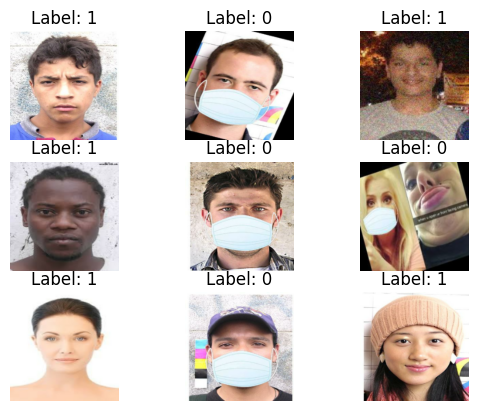

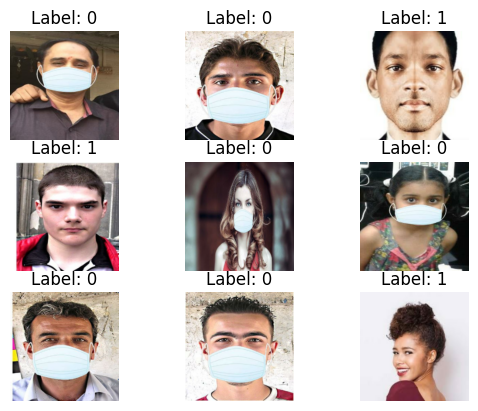

In [38]:
for images, labels in train_ds.take(1):
    # Display the first 9 images and labels
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # No need to convert to uint8
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

# Get a batch of images and labels from the validation dataset
for images, labels in validation_ds.take(1):
    # Display the first 9 images and labels
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # No need to convert to uint8
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


In [39]:
from keras.applications.vgg16 import VGG16
vgg=VGG16()

In [40]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
model=Sequential()
for layer in vgg.layers[:-1]:
    model.add(layer)

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [43]:
for layer in model.layers:
    layer.trainable=False

In [44]:
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [47]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/10
32/32 [==============================] - 194s 6s/step - loss: 0.6783 - accuracy: 0.5819 - val_loss: 0.4635 - val_accuracy: 0.9500
Epoch 2/10
32/32 [==============================] - 184s 6s/step - loss: 0.4416 - accuracy: 0.8440 - val_loss: 0.3453 - val_accuracy: 0.9385
Epoch 3/10
32/32 [==============================] - 180s 6s/step - loss: 0.3369 - accuracy: 0.9185 - val_loss: 0.2620 - val_accuracy: 0.9577
Epoch 4/10
32/32 [==============================] - 178s 6s/step - loss: 0.2775 - accuracy: 0.9323 - val_loss: 0.2170 - val_accuracy: 0.9462
Epoch 5/10
32/32 [==============================] - 178s 6s/step - loss: 0.2432 - accuracy: 0.9392 - val_loss: 0.1887 - val_accuracy: 0.9692
Epoch 6/10
32/32 [==============================] - 177s 6s/step - loss: 0.2316 - accuracy: 0.9313 - val_loss: 0.1746 - val_accuracy: 0.9692
Epoch 7/10
32/32 [==============================] - 178s 6s/step - loss: 0.2043 - accuracy: 0.9470 - val_loss: 0.1639 - val_accuracy: 0.9654
Epoch 8/10
32

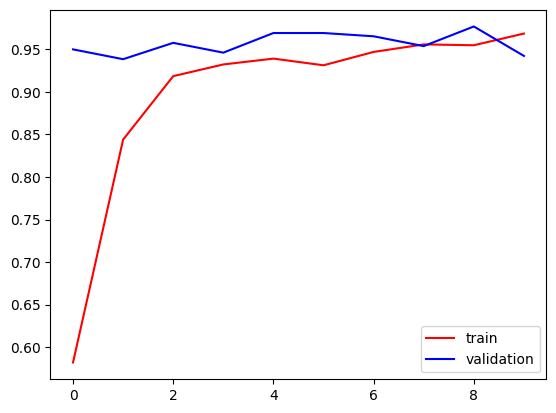

In [48]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

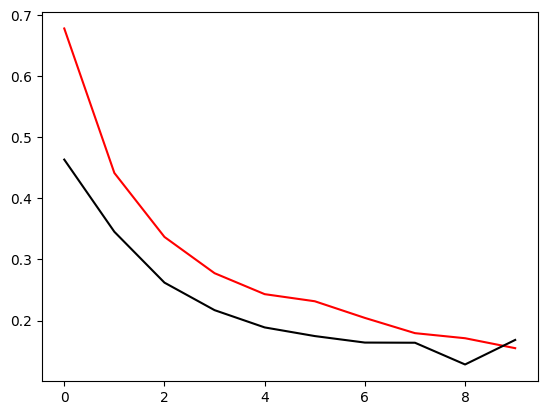

In [53]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='black',label='validation')

In [5]:
from tensorflow.keras.models import save_model,load_model

In [6]:
model1=load_model('facemaskdetection.h5')

In [11]:
import tensorflow as tf
import cv2
img=cv2.imread('3-with-mask_jpg.rf.851daba99bdebf1f877ba08b66ca6106.jpg')
img1=tf.image.resize(img,(224,244))

In [13]:
model1.predict(np.expand_dims(img1,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


array([[0.00048829]], dtype=float32)